In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [29]:
from proj1_helpers import *
from costs import *
from lab_helpers import *
from plots_lab4 import *
from my_helpers import *
import pandas as pd
import matplotlib.pyplot as plt

## To Do Graphs
- PCA Decomposition + Classification
- Correlation
- Changing loss for different algorithms
- ???

## To Do tasks
- Manuel: implement K-fold to choose degree, change split data , deal with outliers, adding log colm (?)
- Gabbo: ?
- Marco: ?

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
DATA_TRAIN_PATH = '../data/train.csv'
y_or, tX_or, ids = load_csv_data(DATA_TRAIN_PATH)

In [30]:
y = y_or
tX = tX_or

### Extra preprocessing for logistic (run only if you wanna run that)

In [15]:
y = y_for_logistic(y)

## Data preprocessing

In [31]:
x_tr_tot, x_te_tot, y_tr_tot, y_te_tot = split_data(y,tX,0.8,1)

In [34]:
y_tr, tX_tr, indexes_tr, means_tr, std_tr = preprocessing(y_tr_tot, x_tr_tot)

In [35]:
y_te, tX_te, indexes_te, means_te, std_te = preprocessing(y_te_tot, x_te_tot)

## All already done: skip

In [101]:
tX_pd = pd.read_csv('../data/train.csv')
tX_pd.drop(labels=['Id', 'Prediction'], axis=1, inplace=True)
tX_pd.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [102]:
tX_pd0 = tX_pd[tX_pd['PRI_jet_num']==0]
tX_pd1 = tX_pd[tX_pd['PRI_jet_num']==1]
tX_pd2 = tX_pd[tX_pd['PRI_jet_num']==2]
tX_pd3 = tX_pd[tX_pd['PRI_jet_num']==3]

In [103]:
tX_pds = [tX_pd0, tX_pd1, tX_pd2, tX_pd3]

In [104]:
#searching for nulls:
for jet in range (0, 4):
    print ("jet: {}".format(jet))
    i = 0
    for c in tX_pds[jet]:
        s = tx_pds[jet][tx_pds[jet][c] == -999].index.size
        if s > 0:
            print(s, i, c)
        i+=1

jet: 0
26123 0 DER_mass_MMC
99913 4 DER_deltaeta_jet_jet
99913 5 DER_mass_jet_jet
99913 6 DER_prodeta_jet_jet
99913 12 DER_lep_eta_centrality
99913 23 PRI_jet_leading_pt
99913 24 PRI_jet_leading_eta
99913 25 PRI_jet_leading_phi
99913 26 PRI_jet_subleading_pt
99913 27 PRI_jet_subleading_eta
99913 28 PRI_jet_subleading_phi
jet: 1
7562 0 DER_mass_MMC
77544 4 DER_deltaeta_jet_jet
77544 5 DER_mass_jet_jet
77544 6 DER_prodeta_jet_jet
77544 12 DER_lep_eta_centrality
77544 26 PRI_jet_subleading_pt
77544 27 PRI_jet_subleading_eta
77544 28 PRI_jet_subleading_phi
jet: 2
2952 0 DER_mass_MMC
jet: 3
1477 0 DER_mass_MMC


In [65]:
#searching for zeros:
for jet in range (0, 4):
    print ("jet: {}".format(jet))
    i = 0
    for c in tX_pds[jet]:
        s = tx_pds[jet][tx_pds[jet][c] == 0].index.size
        if s > 1000:
            print(s, i, c)
        i+=1

jet: 0
99913 22 PRI_jet_num
99913 29 PRI_jet_all_pt
jet: 1
jet: 2
9925 12 DER_lep_eta_centrality
jet: 3
5827 12 DER_lep_eta_centrality


In [153]:
# #dealing with outliers
# for jet in range(0, 4):
#     for i in range(0, tX_new[jet].shape[1]):
#         tX_act = tX_new[jet]
#         q1 = np.quantile(tX_act[:,i], 0.25)
#         q3 = np.quantile(tX_act[:,i], 0.75)
#         iqr = q3 - q1
#         max_val = q3 + 1.5*iqr 
#         indexs_out = tX_act[:,i] > max_val
#         #print(tX_act[indexs_out, :].shape)
#         tX_act[indexs_out, :] = max_val

#### Stop Main Preprocessing

In [57]:
def cross_validation(y, x, k_indices, k, lambda_, degree, acc = False, ls = False):
    """return the loss of ridge regression."""
    losses_tr = []
    losses_te = []
    accuracies = []
    ws = []
    
    for k_group in range(k):
        index_te = k_indices[k_group]
        index_tr = np.setdiff1d(np.arange(len(y)), index_te)
        #print(index_te, index_tr)
        x_te = x[index_te]
        x_tr = x[index_tr]
        y_te = y[index_te]
        y_tr = y[index_tr]
        
        # form data with polynomial degree
        x_te_poly = build_poly(x_te, degree)
        x_tr_poly = build_poly(x_tr, degree)
        
        if (ls==False):
            w = ridge_regression(y_tr, x_tr_poly, lambda_)
        else:
            w = least_squares_lstsq_ver(y_tr, x_tr_poly)
        
        # calculate the loss for train and test data
        rmse_tr = compute_rmse(y_tr, x_tr_poly, w)
        rmse_te = compute_rmse(y_te, x_te_poly, w)
        #print(lambda_, rmse_te)
        losses_tr.append(rmse_tr)
        losses_te.append(rmse_te)
        
        y_pred = predict_labels(w, x_te_poly)
        accuracies.append(accuracy(y_te, y_pred))
        
        ws.append(w)
        
    if acc==False:
        loss_tr = np.median(losses_tr)
        loss_te = np.median(losses_te)
        return loss_tr, loss_te, np.mean(ws, axis=0)
    else:
        return np.mean(accuracies), np.mean(ws, axis=0)

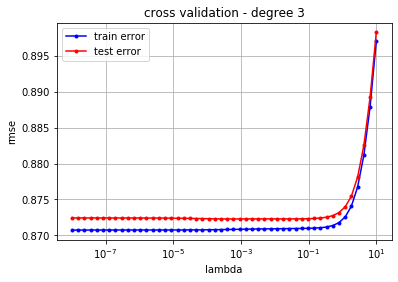

In [237]:
def cross_validation_demo():
    degree = 3
    k_fold = 4
    lambdas = np.logspace(-8, 1, 50)
#     for d in range (1, degree+1):
#         for i in range (0, 3):
    #seed = i
    # split data in k fold
    #y_sub, x_sub = get_subsample(y_tr, x_tr, 10000, seed)
    seed = 1
    k_indices = build_k_indices(y_tr[0], k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y_tr[0], x_tr[0], k_indices, k_fold, lambda_, degree)
        #print(loss_te)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te, degree)

cross_validation_demo()

In [47]:
def select_best_degree(y, x, max_degree, k_fold, seed=1):
    #y_sub, x_sub = get_subsample(y, x, 100000, seed)
    lambdas = np.logspace(-10, 0, 5)
    #lambdas=[1e-06]
    k_indices = build_k_indices(y, k_fold, seed)
    loss_min = np.inf
    degree_star = 0
    lambda_star = 0
    w_star = 0
    for degree in range(1, max_degree+1):
        for lambda_ in lambdas:
            #print(degree)
            loss_tr, loss_te, w = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
            #print(loss_te)
            if loss_te < loss_min:
                loss_min = loss_te
                print("New loss: {}, degree: {}, lambda: {}".format(loss_te, degree, lambda_))
                degree_star = degree
                lambda_star = lambda_
                w_star = w
    return degree_star, lambda_star, loss_min, w_star

In [24]:
def select_best_degree_accuracy(y, x, max_degree, k_fold, seed=1):
    #y_sub, x_sub = get_subsample(y, x, 100000, seed)
    lambdas = np.logspace(-10, 0, 5)
    #lambdas=[1e-06]
    k_indices = build_k_indices(y, k_fold, seed)
    acc_max = 0
    degree_star = 0
    lambda_star = 0
    w_star = 0
    for degree in range(1, max_degree+1):
        for lambda_ in lambdas:
            #print(degree)
            accuracy, w = cross_validation(y, x, k_indices, k_fold, lambda_, degree, acc=True)
            #print(loss_te)
            if accuracy > acc_max:
                acc_max = accuracy
                print("New accuracy: {}, degree: {}, lambda: {}".format(accuracy, degree, lambda_))
                degree_star = degree
                lambda_star = lambda_
                w_star = w
    return degree_star, lambda_star, acc_max, w_star

In [ ]:
max_degree = 8
k_fold = 8
degrees_star=[]
lambdas_star=[]
w_star = []
for jet in range(0, 8):
    print("jet {}: ".format(jet))
    degree_star, lambda_star, loss, w = select_best_degree(y_tr[jet], tX_tr[jet], max_degree, k_fold, 1)
    degrees_star.append(degree_star)
    lambdas_star.append(lambda_star)
    w_star.append(w)
    #print("jet {}: Best accuracy {}, degree: {},  lambda: {}".format(jet, acc, degree_star, lambda_star))
    print("jet{}: best loss: {}, degree: {}, lambda: {}".format(jet, loss, degree_star, lambda_star))

jet 0: 
New loss: 0.4249167699506766, degree: 1, lambda: 1e-10
New loss: 0.4249160599803238, degree: 1, lambda: 3.162277660168379e-08
New loss: 0.42290159516796066, degree: 2, lambda: 1e-10
New loss: 0.41893315322898217, degree: 4, lambda: 1e-10


In [8]:
#accuracy
degrees = [5, 8, 8, 8]
lambdas = [2.807216203941181e-07, 2.807216203941181e-07, 1e-10, 2.2122162910704502e-10]

In [43]:
def select_best_degree_ls(y, x, max_degree, k_fold, seed=1):
    #y_sub, x_sub = get_subsample(y, x, 50000, seed)
    k_indices = build_k_indices(y, k_fold, seed)
    loss_min = np.inf
    degree_star = 0
    lambda_star = 0
    for degree in range(1, max_degree+1):
        rmse_te = []
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, 0, degree, mean=True, ls=True)
        #print(degree, lambda_, loss_te)
        if loss_te < loss_min:
            loss_min = loss_te
            print("New loss: {}, degree: {}".format(loss_te, degree))
            degree_star = degree
    return degree_star

In [52]:
max_degree = 13
k_fold = 8
degrees_star_ls = []
for jet in range(0, 4):
    degree_star_ls = select_best_degree_ls(y_tr[jet], tX_tr[jet], max_degree, k_fold, 1)
    degrees_star_ls.append(degree_star_ls)
    print("Best degree for jet {} for least squares: {}".format(jet, degree_star_ls))

New loss: 0.7361479935065579, degree: 1
New loss: 0.7081331175137364, degree: 2
New loss: 0.7042588060195737, degree: 3
New loss: 0.7031084041385761, degree: 4
Best degree for least squares: 4
New loss: 0.8642239524433158, degree: 1
New loss: 0.8280068635705337, degree: 2
New loss: 0.8255413920585553, degree: 3
New loss: 0.8214537575154983, degree: 5
Best degree for least squares: 5
New loss: 0.8417973669655965, degree: 1
New loss: 0.8074770514863915, degree: 2
New loss: 0.7993306312028321, degree: 4
Best degree for least squares: 4
New loss: 0.8454785517535026, degree: 1
New loss: 0.8173852852871264, degree: 2
New loss: 0.8039465316482824, degree: 5
Best degree for least squares: 5


In [71]:
#acc 0.7888 ridge (0.798 on real test)
lambdas = [1e-09, 1.1288378916846883e-08, 0.00018329807108324338, 1e-09]
degrees = [3, 5, 5, 5]

In [9]:
#acc 0.79634 ridge (0.785 on real test)
lambdas = [1e-07, 1e-07, 1e-08, 1e-08]
degrees = [5, 5, 5, 6]

In [ ]:
#acc 0.79636
lambdas = [2.807216203941181e-07, 2.807216203941181e-07, 1e-10, 2.2122162910704502e-10]
degrees = [5, 5, 5, 6]

In [61]:
#good 0.79 acc least square (lstsq ver)
degrees_ls = [4, 5, 4, 5]

## Start working

In [46]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        g = compute_gradient(y, tx, w)
        new_w = w - gamma*g;
        new_loss = compute_loss(y, tx, new_w)
        # print TO DELETE IN FINAL VERSION
        if new_loss <= loss:
            loss, w = new_loss, new_w
            gamma *=1.8 #accelerate algorithm learning rate
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3 #decelerate to avoid exponential growing
            #print("Gradient Descent({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma)
        print("Gradient Descent({bi}/{ti}): ||gradient||={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [47]:
# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.0001

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
gradient_w, gradient_loss = gradient_descent(y, tX, w_initial, max_iters, gamma)

Gradient Descent(0/199): ||gradient||=0.9198964473372747, loss=0.49991543478685996, w0=-3.1381702249274604e-05, w1=-1.870332018899931e-05
Gradient Descent(1/199): ||gradient||=0.9186848945865361, loss=0.4997636980245322, w0=-8.78042153832626e-05, w1=-5.236507656267239e-05
Gradient Descent(2/199): ||gradient||=0.9165086790795948, loss=0.4994921215723027, w0=-0.00018915591588298592, w1=-0.00011294257728487969
Gradient Descent(3/199): ||gradient||=0.9126063083581455, loss=0.4990082616199879, w0=-0.000370914263529803, w1=-0.0002219378872869192
Gradient Descent(4/199): ||gradient||=0.9056299309807633, loss=0.49815319084166065, w0=-0.0006959041130019329, w1=-0.00041798666987893115
Gradient Descent(5/199): ||gradient||=0.8932269289430593, loss=0.49666407351067016, w0=-0.0012739014639035493, w1=-0.0007704142328603178
Gradient Descent(6/199): ||gradient||=0.8713980371643467, loss=0.49413764114400255, w0=-0.002292032255140569, w1=-0.0014033062129404496
Gradient Descent(7/199): ||gradient||=0.833

In [48]:
def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    w = initial_w
    loss = np.inf
    for n_iter in range(max_iters):
        for yn, xn in batch_iter(y, tx, batch_size):
            g = compute_stoch_gradient(yn, xn, w)
            new_w = w - gamma*g;
            new_loss = compute_loss(y, tx, new_w)
        if new_loss <= loss:
            loss , w = new_loss , new_w
            gamma *=1.8
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma aumenta".format(
             # bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        else:
            gamma *=0.3
            #print("SGD({bi}/{ti}): loss={l} ; gamma={g}; gamma diminuisce".format(
             #     bi=n_iter, ti=max_iters - 1, l=loss, g= gamma))
        print("SGD({bi}/{ti}): |gradient|={grad}, loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, grad=np.linalg.norm(g), l=loss, w0=w[0], w1=w[1]))

    return w, loss

In [49]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.01
batch_size = 1

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
sgd_loss, sgd_w = stochastic_gradient_descent(
    y, tX, w_initial, batch_size, max_iters, gamma)


SGD(0/99): |gradient|=3.819894318273993, loss=0.5415004344865282, w0=0.011805540261408516, w1=-0.002686097454581817
SGD(1/99): |gradient|=3.313465869115332, loss=0.5415004344865282, w0=0.011805540261408516, w1=-0.002686097454581817
SGD(2/99): |gradient|=2.7465500598415247, loss=0.5231169592050283, w0=0.006188461831573778, w1=-0.003969062074416842
SGD(3/99): |gradient|=3.2750457421264016, loss=0.49026883819335143, w0=-0.0036366473237117534, w1=-0.008645873148768043
SGD(4/99): |gradient|=3.648974628785057, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(5/99): |gradient|=3.4494660744980905, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(6/99): |gradient|=3.143628555043909, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(7/99): |gradient|=2.8915114659527927, loss=0.4714873513207109, w0=-0.019703815429169942, w1=-0.026240410268246465
SGD(8/99): |gradient|=2.897412774883511, loss=0.4714873513207

In [46]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    D = tx.shape[1]
    G = tx.T.dot(tx)
    if(np.linalg.matrix_rank(G)==D):
        w = np.linalg.inv(G).dot(tx.T).dot(y)
    else:
        w = np.linalg.solve(G,tx.T.dot(y))
    return w

In [48]:
def least_squares_lstsq_ver(y, tx):
    """calculate the least squares solution."""
    D = tx.shape[1]
    G = tx.T.dot(tx)
    if(np.linalg.matrix_rank(G)==D):
        w = np.linalg.inv(G).dot(tx.T).dot(y)
    else:
        w = np.linalg.lstsq(G,tx.T.dot(y), rcond=None) [0]
    return w

In [55]:
w = []
for jet in range(0,4):
    x_tr_poly = build_poly(tX_tr[jet], degrees_star_ls[jet])
    w.append(least_squares_lstsq_ver(y_tr[jet], x_tr_poly))
    print(compute_loss(y_te[jet], build_poly(tX_te[jet], degrees_star_ls[jet]), w[jet]))

0.25108353401177774
2.302894037351024
0.32681724036218224
0.47402537599287914


In [10]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = len(y)
    G = tx.T.dot(tx)
    i = np.linalg.inv(G + 2*N*lambda_*np.eye(G.shape[0]))
    w_star = i.dot(tx.T).dot(y)
    return w_star

In [190]:
#degrees star version
w = []
for jet in range(0,4):
    x_tr_poly = build_poly(tX_tr[jet], degrees_star[jet])
    w.append(ridge_regression(y_tr[jet], x_tr_poly, lambdas_star[jet]))
    print(compute_loss(y_te[jet], build_poly(tX_te[jet], degrees_star[jet]), w[jet]))

0.3427725541434394
105844.23254608287
7373.296251656729
3027.1645594095685


In [11]:
#degrees saved version
w = []
for jet in range(0,4):
    x_tr_poly = build_poly(tX_tr[jet], degrees[jet])
    w.append(ridge_regression(y_tr[jet], x_tr_poly, lambdas[jet]))
    print(compute_loss(y_te[jet], build_poly(tX_te[jet], degrees[jet]), w[jet]))

0.3427725541434394
2.1826414026231085
0.5535167673565986
2.296580118917571


## Generate predictions and save ouput in csv format for submission:

#### Use Accuracy and F1 Score on our classification:

In [26]:
y_pred = build_predictions(tX_te, indexes_te, w_star, degrees_star) #leave degree blank if it's not polynomial

In [ ]:
#cell for logistic
y_pred = build_predictions(tX_te, indexes_te, w, degrees, logistic=True) #leave degree blank if it's not polynomial, add logistic flag to build [0,1]

In [27]:
acc = accuracy(y_te_tot, y_pred)
print(acc)

0.6597


#### Build submission

In [156]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test_new, indexes_test_new, means_test, stds_test = preprocessing([], tX_test, test=True) #same function as train, test=True is to avoid computation on the y

In [193]:
#cell for normal regression
y_pred_test = build_predictions(tX_test_new, indexes_test_new, w, degrees)
OUTPUT_PATH = '../data/submission.csv'
create_csv_submission(ids_test, y_pred_test, OUTPUT_PATH)

In [ ]:
#cell for logistic
y_pred_test = build_predictions(tX_test_new, indexes_test_new, w, degrees, logistic=True)
OUTPUT_PATH = '../data/submission.csv'
create_csv_submission(ids_test, y_pred_test, OUTPUT_PATH, logistic=True) #logistic flags convert [0, 1] to [-1, 1]

In [12]:
#we will need something like this

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tX_test_s)
plt.scatter(principalComponents[:,0], principalComponents[:,1])

NameError: name 'tX_test_s' is not defined